# Определение возраста покупателей

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span><ul class="toc-item"><li><span><a href="#Цель-проекта" data-toc-modified-id="Цель-проекта-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Цель проекта</a></span></li><li><span><a href="#Постановка-задачи" data-toc-modified-id="Постановка-задачи-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Постановка задачи</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-необходимых-библиотек" data-toc-modified-id="Загрузка-необходимых-библиотек-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка необходимых библиотек</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Промежуточные-выводы" data-toc-modified-id="Промежуточные-выводы-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Промежуточные выводы</a></span></li></ul></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение модели</a></span></li><li><span><a href="#Анализ-обученной-модели" data-toc-modified-id="Анализ-обученной-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ обученной модели</a></span></li><li><span><a href="#Итоговые-выводы" data-toc-modified-id="Итоговые-выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоговые выводы</a></span><ul class="toc-item"><li><span><a href="#Отчет-о-проделанной-работе" data-toc-modified-id="Отчет-о-проделанной-работе-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Отчет о проделанной работе</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li></ul></div>

## Описание проекта

### Цель проекта

Цель данного проекта - построить модель, которая по фотографии определит приблизительный возраст человека.

### Постановка задачи

Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:
* Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
* Контролировать добросовестность кассиров при продаже алкоголя.

Необходимо построить и обучить свёрточную нейронную сеть, которая по фотографии определит приблизительный возраст человека. 
В нашем распоряжении набор фотографий людей с указанием возраста.

Значения MAE на тестовой выборке должно быть не больше 8.

Необходимо:

1.	Провести исследовательский анализ набора фотографий.
2.	Подготовить данные к обучению.
3.	Обучить нейронную сеть и рассчитать её качество.

### Описание данных

Данные взяты с сайта 
[ChaLearn Looking at People](https://chalearnlap.cvc.uab.cat/dataset/26/description/).

Они находятся в папке `/datasets/faces/`. 

В нашем распоряжении папка со всеми изображениями `/final_files` и CSV-файл `labels.csv` с двумя колонками: `file_name` и `real_age`. 

## Исследовательский анализ данных

### Загрузка необходимых библиотек

In [1]:
! pip install missingno -q

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import missingno as msno;

### Загрузка данных

In [3]:
path = '/datasets/faces/'
labels = pd.read_csv(path + 'labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
    dataframe=labels,
    directory=path + 'final_files/',
    x_col='file_name',
    y_col='real_age',
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw',
    seed=12345);

Found 7591 validated image filenames.


### Изучение данных

Изучим общую информацию о датасете:

In [4]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


Изучим размеры датасета:

In [5]:
display(labels.shape)

(7591, 2)

Выведем случайный набор данных:

In [6]:
labels.sample(n=10, random_state=12345)

,file_name,real_age
5370,005370.jpg,50
4516,004516.jpg,41
3968,003968.jpg,46
2188,002188.jpg,85
5833,005833.jpg,14
5521,005521.jpg,40
5393,005393.jpg,14
3913,003913.jpg,53
934,000934.jpg,4
6260,006264.jpg,32


Изучим пропуски:

<AxesSubplot:>

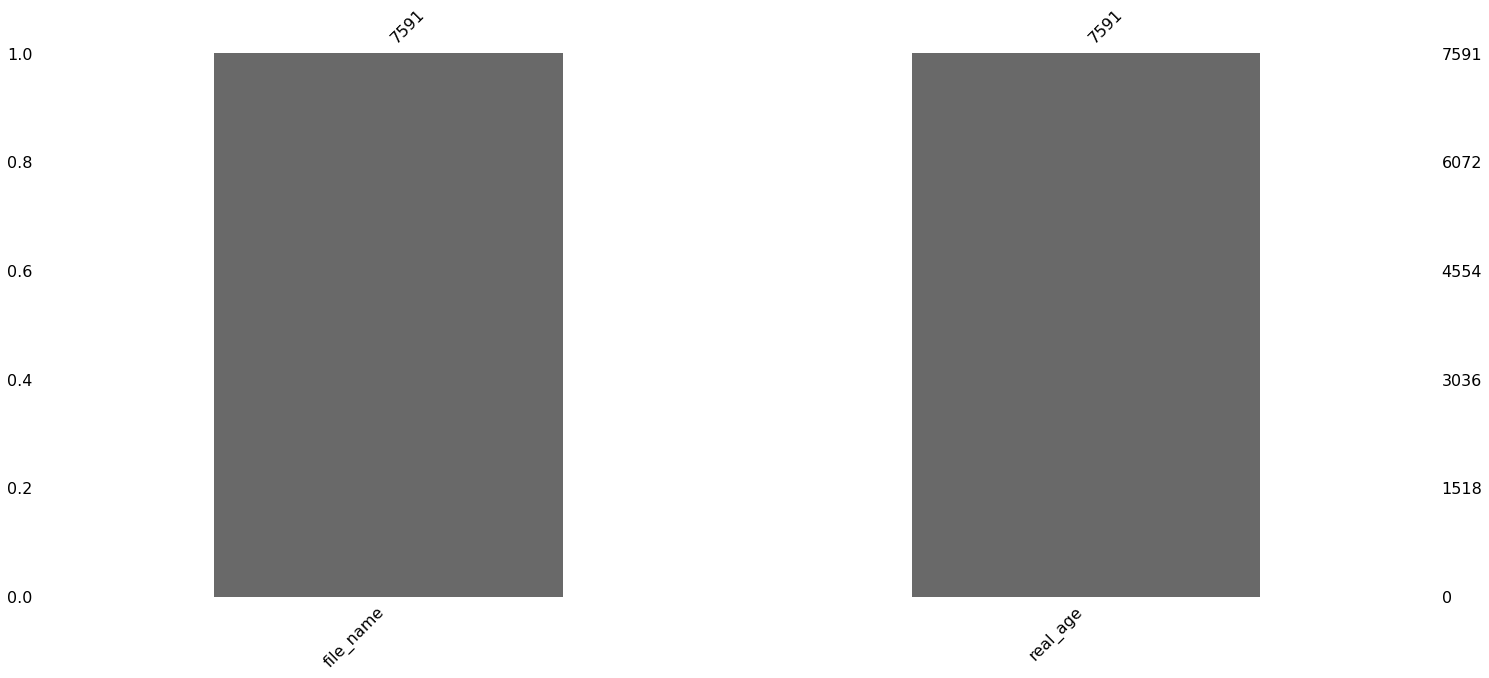

In [7]:
display(msno.bar(labels))
plt.show()

Изучим описание полей датасета:

In [8]:
labels.describe().T

,count,mean,std,min,25%,50%,75%,max
real_age,7591.0,31.201159,17.14506,1.0,20.0,29.0,41.0,100.0


Посмотрим на распределение по возрасту:

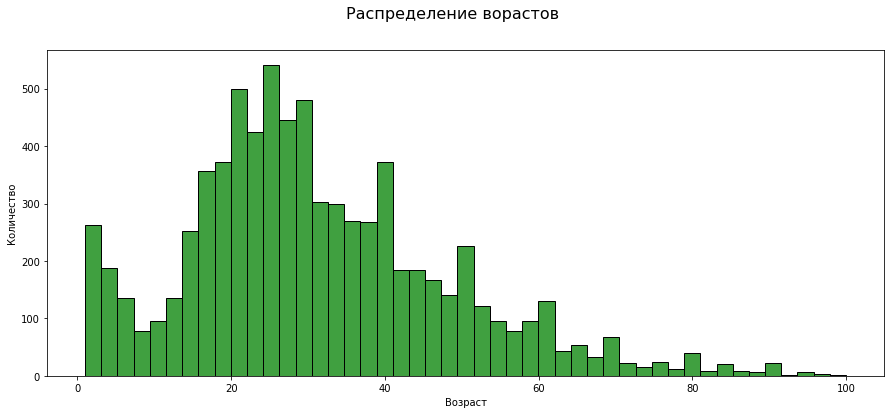

In [9]:
fig = plt.figure(figsize=(15,6))
plt.suptitle('Распределение ворастов', fontsize=16, ha='center')
ax = sns.histplot(labels['real_age'], color='green')
ax.set_xlabel('Возраст')
ax.set_ylabel('Количество');

Посмотрим изображения:

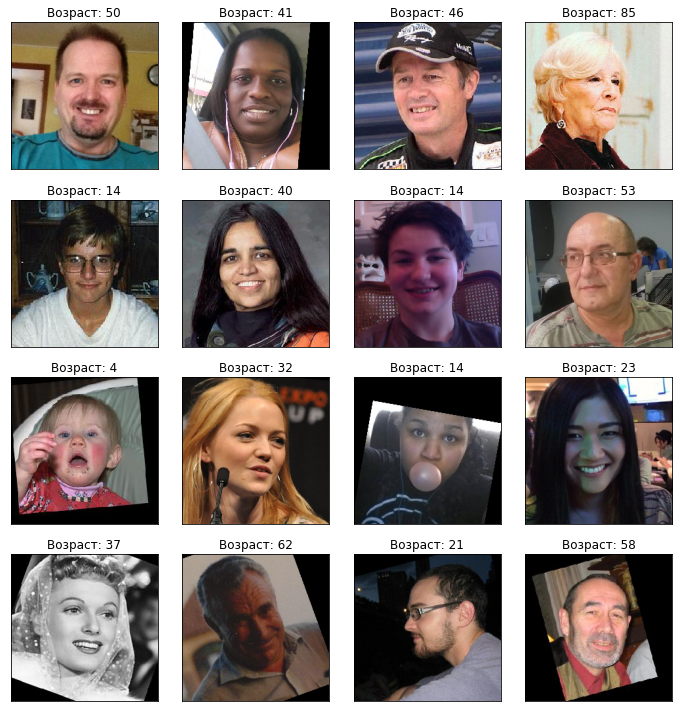

In [10]:
features, target = next(train_gen_flow)

fig = plt.figure(figsize=(10,10))
for i in range(16):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.title('Возраст: ' + str(target[i]))

### Промежуточные выводы

* В данных 7591 запись.
* Пропуски в данных не выявлены.
* При обучении модели будем использовать 75% данных для обучения, 25% для валидации.
* В выборке цветные и черно-белые изображения людей разных возрастов - мужчины, женщины, дети.
* Больше всего людей в возрасте от 16 до 40 лет.
* Меньше всего людей от 80 до 100 лет.
* Есть пики в значениях кратных 10 (20, 30, ...). Вероятно при разметке данных был указан примерный возраст.
* Для обучения будем использовать сверточную нейросеть `ResNet50`.

## Обучение модели

Код обучения модели:

```python
import pandas as pd
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    train_datagen = ImageDataGenerator(
        validation_split=0.25,
        rescale=1./255,
        horizontal_flip=True
        )
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=12345
        )
    return train_gen_flow


def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    test_datagen = ImageDataGenerator(
        validation_split=0.25,
        rescale=1./255
        )
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=12345
        )
    return test_gen_flow


def create_model(input_shape):
    backbone = ResNet50(
        weights='/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
        input_shape=input_shape,
        include_top=False
        )
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
    optimizer = Adam(lr=0.0005)
    model.compile(
        optimizer=optimizer,
        loss='mse',
        metrics=['mae']
        )
    return model


def train_model(model, train_data, test_data, batch_size=None, epochs=8,
                steps_per_epoch=None, validation_steps=None):
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
    model.fit(
        train_data,
        validation_data=test_data,
        batch_size=batch_size,
        epochs=epochs,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps,
        verbose=2
        )

    return model
```

Результат вывода на экран:

```
2024-05-13 10:17:50.262776: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer.so.6
2024-05-13 10:17:50.264500: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer_plugin.so.6
2024-05-13 10:17:51.189361: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2024-05-13 10:17:51.199666: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2024-05-13 10:17:51.199741: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2024-05-13 10:17:51.199785: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2024-05-13 10:17:51.202010: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2024-05-13 10:17:51.202453: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2024-05-13 10:17:51.205062: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2024-05-13 10:17:51.206653: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2024-05-13 10:17:51.206726: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2024-05-13 10:17:51.210526: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
Using TensorFlow backend.
Found 5694 validated image filenames.
Found 1897 validated image filenames.
2024-05-13 10:17:51.397797: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2024-05-13 10:17:51.404357: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2099990000 Hz
2024-05-13 10:17:51.404903: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x3b3ecb0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2024-05-13 10:17:51.404927: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2024-05-13 10:17:51.589311: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x319efd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-13 10:17:51.589349: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-SXM2-32GB, Compute Capability 7.0
2024-05-13 10:17:51.591019: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2024-05-13 10:17:51.591080: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2024-05-13 10:17:51.591089: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2024-05-13 10:17:51.591118: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2024-05-13 10:17:51.591127: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2024-05-13 10:17:51.591136: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2024-05-13 10:17:51.591145: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2024-05-13 10:17:51.591152: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2024-05-13 10:17:51.594272: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2024-05-13 10:17:51.594329: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2024-05-13 10:17:52.057215: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1096] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-05-13 10:17:52.057267: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1102]      0 
2024-05-13 10:17:52.057276: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] 0:   N 
2024-05-13 10:17:52.060246: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2024-05-13 10:17:52.060293: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1241] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 10240 MB memory) -> physical GPU (device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:8b:00.0, compute capability: 7.0)
<class 'tensorflow.python.keras.engine.sequential.Sequential'>
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 178 steps, validate for 60 steps
Epoch 1/8
2024-05-13 10:18:03.543867: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2024-05-13 10:18:03.919429: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
178/178 - 49s - loss: 196.6582 - mae: 10.4327 - val_loss: 448.2374 - val_mae: 16.0956
Epoch 2/8
178/178 - 40s - loss: 112.8894 - mae: 8.0722 - val_loss: 363.7653 - val_mae: 14.2082
Epoch 3/8
178/178 - 38s - loss: 87.5361 - mae: 7.0518 - val_loss: 459.4565 - val_mae: 16.3541
Epoch 4/8
178/178 - 38s - loss: 71.6099 - mae: 6.4559 - val_loss: 215.1498 - val_mae: 11.5949
Epoch 5/8
178/178 - 38s - loss: 55.9277 - mae: 5.7040 - val_loss: 126.6931 - val_mae: 8.4626
Epoch 6/8
178/178 - 38s - loss: 46.5013 - mae: 5.2461 - val_loss: 88.2000 - val_mae: 7.1161
Epoch 7/8
178/178 - 38s - loss: 40.3763 - mae: 4.8566 - val_loss: 80.8147 - val_mae: 6.7163
Epoch 8/8
178/178 - 39s - loss: 32.7203 - mae: 4.3845 - val_loss: 76.2881 - val_mae: 6.5810
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
60/60 - 10s - loss: 76.2881 - mae: 6.5810
Test MAE: 6.5810
```

## Анализ обученной модели

Проведено обучение свёрточной нейросети `ResNet50`.

Модель определяет возраст человека по фотографии с ошибкой 6.6 года, что удовлетворяют целевому значению метрики `MAE` < 8.

## Итоговые выводы

### Отчет о проделанной работе

**Цель данного проекта - построить модель, которая по фотографии определит приблизительный возраст человека.**

**В ходе загрузки и изучения данных:**
* В ходе изучения данных выявили, что:
    - В данных 7591 запись.
    - Пропуски в данных не выявлены.
    - В выборке цветные и черно-белые изображения людей разных возрастов - мужчины, женщины, дети.

**Обучена модель:**
* `ResNet50` - свёрточная нейросеть.
* Модель удовлетворяют целевому значению метрики `MAE` < 8.

### Выводы

1. **Модель рекомендована заказчику для определения возраста клиентов.**
2. **Модель может позволить анализировать покупки и предлагать товары, которые могут заинтересовать покупателей определенной возрастной группы.**
3. **Вместе с тем, модель скорее всего не позволит контролировать добросовестность кассиров при продаже алкоголя, так как ошибка в 6.6 года критична в данной задаче.**